In [1]:
import numpy as np
from myplotstyle import plt, get_figsize, cmr

from easyquery import Query, QueryMaker
import SAGA
from SAGA import ObjectCuts as C
from SAGA import HostCuts as H

In [2]:
print(SAGA.__version__)
saga = SAGA.QuickStart()

3.0.0
SAGA `shared_dir` set to /home/yymao/Dropbox/Work/SAGA
SAGA `local_dir`  set to /home/yymao/Documents/Work/Data/SAGA


In [3]:
base = H.paper3.filter(saga.object_catalog.load_combined_base_catalog())
nhosts = len(np.unique(base["HOSTID"]))
assert nhosts == 101

/home/yymao/miniforge3/envs/mypy/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yymao/miniforge3/envs/mypy/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


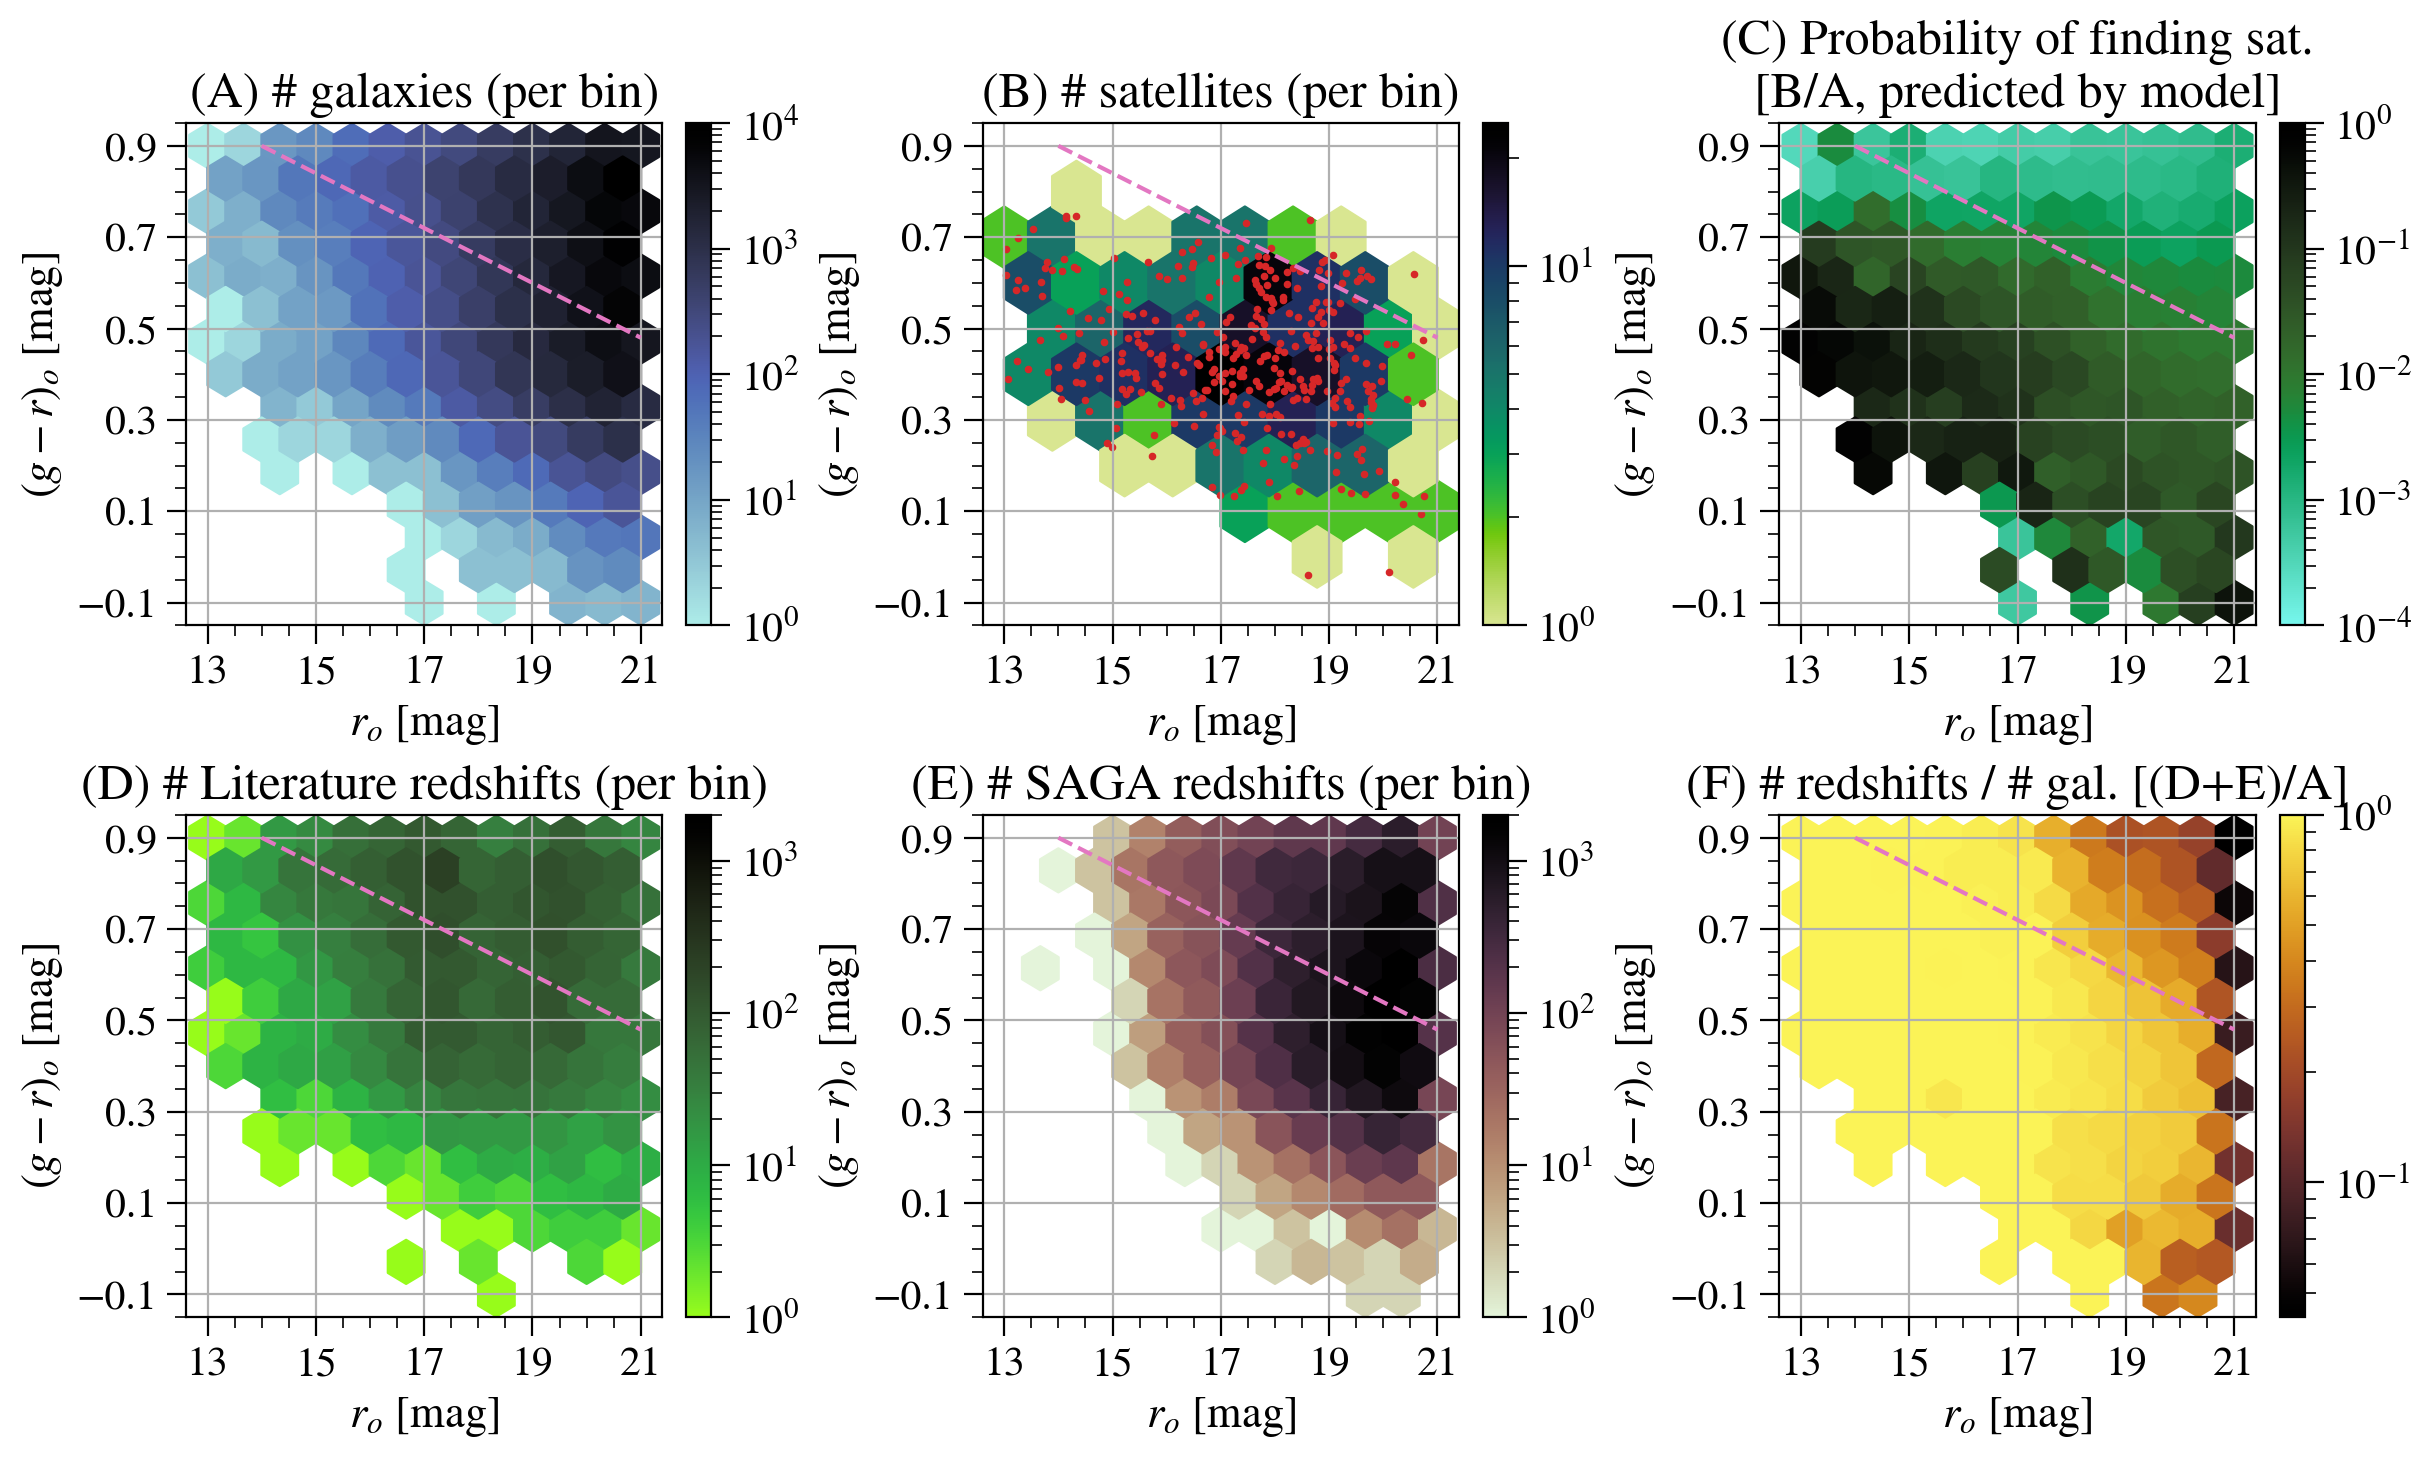

In [4]:
is_valid = Query(C.sat_rcut, C.valid_g_mag, "r_mag >= 13", "r_mag < 21", "gr > -0.1", "gr < 0.9")
sample = Query(is_valid).filter(base)
sats = Query(C.is_sat, is_valid).filter(base)

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=get_figsize(wide=True, ratio=1.7))
r = np.linspace(14, 21, 3)

ax_this = ax[0][0]
opt = dict(gridsize=(12, 7), cmap=cmr.sapphire_r, extent=(13, 21, -0.1, 0.9), vmin=1, vmax=1e4, mincnt=0)
CS = ax_this.hexbin(sample["r_mag"], sample["gr"], bins="log", **opt)
ax_this.set_title("(A) # galaxies (per bin)")
ax_this.plot(r, -0.06*(r-14) + 0.9, color='C6', ls="--", alpha=1)
plt.colorbar(CS, ax=ax_this)

ax_this = ax[0][1]
opt = dict(gridsize=(9, 5), cmap=cmr.toxic_r, extent=(13, 21, -0.1, 0.9), mincnt=0)
CS = ax_this.hexbin(sats["r_mag"], sats["gr"], bins="log", **opt)
ax_this.scatter(sats["r_mag"], sats["gr"], c="C3", s=3)
ax_this.set_title("(B) # satellites (per bin)")
ax_this.plot(r, -0.06*(r-14) + 0.9, color='C6', ls="--", alpha=1)
plt.colorbar(CS, ax=ax_this)

ax_this = ax[0][2]
opt = dict(gridsize=(12, 7), cmap=cmr.emerald_r, extent=(13, 21, -0.1, 0.9), vmin=1e-4, vmax=1, mincnt=0)
CS = ax_this.hexbin(sample["r_mag"], sample["gr"], sample["p_sat_model_p3"], reduce_C_function=np.mean, bins="log", **opt)
ax_this.set_title("(C) Probability of finding sat.\n[B/A, predicted by model]")
ax_this.plot(r, -0.06*(r-14) + 0.9, color='C6', ls="--", alpha=1)
plt.colorbar(CS, ax=ax_this)

ax_this = ax[1][0]
sample_this = Query(C.has_spec, ~C.has_our_specs_only).filter(sample)
opt = dict(gridsize=(12, 7), cmap=cmr.nuclear_r, extent=(13, 21, -0.1, 0.9), vmin=1, vmax=2e3, mincnt=0)
CS = ax_this.hexbin(sample_this["r_mag"], sample_this["gr"], bins="log", **opt)
ax_this.set_title("(D) # Literature redshifts (per bin)")
ax_this.plot(r, -0.06*(r-14) + 0.9, color='C6', ls="--", alpha=1)
plt.colorbar(CS, ax=ax_this)

ax_this = ax[1][1]
sample_this = Query(C.has_spec, C.has_our_specs_only).filter(sample)
opt = dict(gridsize=(12, 7), cmap=cmr.sepia_r, extent=(13, 21, -0.1, 0.9), vmin=1, vmax=2e3, mincnt=0)
CS = ax_this.hexbin(sample_this["r_mag"], sample_this["gr"], bins="log", **opt)
ax_this.set_title("(E) # SAGA redshifts (per bin)")
ax_this.plot(r, -0.06*(r-14) + 0.9, color='C6', ls="--", alpha=1)
plt.colorbar(CS, ax=ax_this)

ax_this = ax[1][2]
opt = dict(gridsize=(12, 7), cmap=cmr.amber, extent=(13, 21, -0.1, 0.9),  vmax=1, mincnt=0)
CS = ax_this.hexbin(sample["r_mag"], sample["gr"], C.has_spec.mask(sample).astype(np.float64), reduce_C_function=np.mean, bins="log", **opt)
ax_this.set_title("(F) # redshifts / # gal. [(D+E)/A]")
ax_this.plot(r, -0.06*(r-14) + 0.9, color='C6', ls="--", alpha=1)
plt.colorbar(CS, ax=ax_this)

for ax_this in ax.flat:
    ax_this.set_xlabel("$r_{o}$ [mag]")
    ax_this.set_ylabel("$(g-r)_{o}$ [mag]")
    ax_this.xaxis.set_ticks(np.arange(13, 22, 2))
    ax_this.yaxis.set_ticks(np.arange(-0.1, 1.0, 0.2))
    ax_this.grid()

plt.savefig("plots/targets.pdf")